In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_ollama import ChatOllama

In [2]:
model = ChatOllama(model="gemma3:4b")

In [4]:
class BlogState(TypedDict):
    
    title: str
    outline: str
    content: str

In [5]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm generate outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [6]:
def create_blog(state: BlogState) -> BlogState:
    
    # fetch title and outline
    title = state['title']
    outline = state['outline']
    
    # create a prompt
    prompt = f"Write a detailed blog on the title -{title} using the following outline \n {outline}"
    content = model.invoke(prompt).content
    
    # update state
    state['content'] = content
    
    return state

In [7]:
graph = StateGraph(BlogState)

# nodes
graph.add_node("create_outline", create_outline)
graph.add_node("create_blog", create_blog)

# edges
graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "create_blog")
graph.add_edge("create_blog", END)

# compile the graph
workflow = graph.compile()

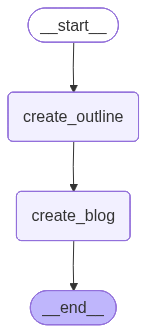

In [8]:
# graph digram
workflow

In [9]:
# testing
initial_state = {"title":"Rise of AI in India"}

final_state = workflow.invoke(initial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': 'Okay, here\'s a detailed outline for a blog post on "The Rise of AI in India," designed to be engaging, informative, and cover a good range of perspectives.  I\'ve broken it down into sections with estimated word counts (adjust as needed for your target audience and blog style).\n\n**Blog Title Options:** (Choose one that fits your tone)\n\n* The AI Revolution is Here: India\'s Rise\n* India\'s AI Boom: Opportunities, Challenges, and the Future\n* Decoding India’s AI Surge: What You Need to Know\n\n**I. Introduction (150-200 words)**\n\n* **Hook:** Start with a compelling statistic or anecdote – e.g., “India is now one of the fastest-growing AI markets globally, driven by…”.  Or a short story about an AI application making a real-world difference in India.\n* **Context:** Briefly define AI (avoid overly technical jargon) – Machine Learning, Deep Learning, and their relevance.\n* **Thesis Statement:**  Clearly state the main point:  “India’s 

In [12]:
# outline of the blog
print(final_state['outline'])

Okay, here's a detailed outline for a blog post on "The Rise of AI in India," designed to be engaging, informative, and cover a good range of perspectives.  I've broken it down into sections with estimated word counts (adjust as needed for your target audience and blog style).

**Blog Title Options:** (Choose one that fits your tone)

* The AI Revolution is Here: India's Rise
* India's AI Boom: Opportunities, Challenges, and the Future
* Decoding India’s AI Surge: What You Need to Know

**I. Introduction (150-200 words)**

* **Hook:** Start with a compelling statistic or anecdote – e.g., “India is now one of the fastest-growing AI markets globally, driven by…”.  Or a short story about an AI application making a real-world difference in India.
* **Context:** Briefly define AI (avoid overly technical jargon) – Machine Learning, Deep Learning, and their relevance.
* **Thesis Statement:**  Clearly state the main point:  “India’s growing interest in and investment in AI is being fueled by [

In [13]:
# content of the blog
print(final_state['content'])

Okay, fantastic outline! This is incredibly detailed and gives me a really solid framework to work with. Let’s refine this and I'll provide some specific details based on your questions.

**1. Audience & Tone:**

*   **Audience:**  Let’s target **business professionals and tech enthusiasts** – people who are interested in the economic and technological implications of AI, and who have a basic understanding of technology. We're aiming for an intelligent, engaging read, not overly technical.
*   **Tone:** Let's go for an **optimistic but realistic** tone. We'll highlight the enormous potential of AI in India, but also acknowledge the challenges and the need for responsible development.  We want to instill confidence while maintaining a critical perspective.


**2. Blog Title Options (Selected & Justification):**

I'd recommend **"India’s AI Boom: Opportunities, Challenges, and the Future"**. It’s broad enough to attract a wide audience but clearly communicates the core themes of the blog